# Установка библиотек

In [2]:
import pandas as pd #для работы с таблицами

Для автоматического применения статистического критерия (теста) используется модуль `stats` библиотеки `scipy`.

Этот модуль содержит большое количество вероятностных распределений, корреляционные функции и статистические тесты и многое другое.

Также активно используется библиотека `statsmodels`

Для установки библиотеки `scipy` и `statsmodels` можно воспользоваться менеджером пакетов `pip`.

In [3]:
!pip install scipy


[notice] A new release of pip available: 22.3 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install statsmodels


[notice] A new release of pip available: 22.3 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip



# Загрузка данных

Для скачивания данных используем команду `!wget`. 

Данные появятся в локальной директории.

Мы будем использовать информацию о диаметре пицц разных производителей.

In [5]:
!wget https://raw.githubusercontent.com/harika-bonthu/Hypothesis-test-examples/main/pizzas.csv

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


Загрузим данные в память ноутбука.

In [6]:
data = pd.read_csv('pizzas.csv')

In [7]:
data.rename(columns={'Making Unit 1': 'Пиццерия №1', 'Making Unit 2': 'Пиццерия №2'}, inplace=True)

In [8]:
data.head()

,Пиццерия №1,Пиццерия №2
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


# Проверка данных на нормальность


In [9]:
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

Установим уровень значимости

In [10]:
alpha = 0.05

## Тест Шапиро-Уилка

In [11]:
from scipy.stats import shapiro

In [12]:
_, p = shapiro(data)
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.204
Данные распределены нормально


## Тест Д’Агостино

In [13]:
from scipy.stats import normaltest

In [14]:
_, p = normaltest(data)
#normaltest возвращает двустороннюю вероятность для проверки гипотезы

print('p=%.3f' % p[0])

# Интерпретация 

if p[0] > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.251
Данные распределены нормально


# Независимый T-тест 

In [15]:
from scipy.stats import ttest_ind

In [16]:
H0 = 'Нет значимой разницы между диаметрами пиццы в разных пиццериях.'
Ha = 'Есть значимая разница между диаметрами пиццы в разных пиццериях.'

Зависимая переменная (диаметр пиццы) является количественной. Группы происходят из разных совокупностей. Следовательно, мы используем независимый T-тест.

In [17]:
def t_test(df):
    print('\n' + "*** Результаты независимого T-теста ***")
    test_results = ttest_ind(data['Пиццерия №1'], data['Пиццерия №2'], equal_var=True)

    p = round(test_results[1],2)

    if p>alpha:
        print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
    else:
        print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

t_test(data)


*** Результаты независимого T-теста ***
0.47 > 0.05. Мы не можем отвергнуть нулевую гипотезу. Нет значимой разницы между диаметрами пиццы в разных пиццериях.


-----

# Корреляция Спирмана 

In [18]:
from numpy.random import rand
from scipy.stats import spearmanr

data1 = rand(1000) * 20
data2 = data1 + (rand(1000) * 10)


corr, p = spearmanr(data1, data2)

In [19]:
print(corr,p)

0.8973981693981694 0.0


In [20]:
if p>alpha:
    print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу об отсутсвии зависимости между переменными.")
else:
    print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными.")

0.0 <= 0.05. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными.


# ANOVA тест

In [21]:
from scipy.stats import f_oneway

Однофакторный дисперсионный анализ ANOVA проверяет нулевую гипотезу о том, что две или более групп имеют одинаковое среднее значение генеральной совокупности.

В качестве данных возьмем информацию по размерам раковины мидий, выращенных в разных местах.

In [22]:
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,
           0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

In [23]:
_, p = f_oneway(petersburg, magadan, tvarminne)

In [24]:
H0 = 'Нет значимой разницы между средним размером раковины мидий в трех разных местах.'
Ha = 'Есть значимая разница между средним размером раковины мидий в трех разных местах.'

In [25]:
if p>alpha:
  print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
else:
  print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

0.007870900547143827 <= 0.05. Мы отвергаем нулевую гипотезу. Есть значимая разница между средним размером раковины мидий в трех разных местах.


_____

# Домашнее задание

Используя информацию по мидиям Петербурга и Магадана, которые представлены в виде двух массивов petersburg и magadan в разделе ANOVA тест, проверьте данные на нормальность и на наличие корреляции. Для этого объедините 2 массива в DataFrame. Обоснуйте выбор теста на корреляцию. Сделайте вывод по гипотезе.
 
 
Также ответьте на вопрос:
Какова разница в среднем размере мидии в зависимости от города-производителя. Обоснуйте выбор теста. Сделайте вывод по гипотезе.


## Используя информацию по мидиям Петербурга и Магадана, которые представлены в виде двух массивов petersburg и magadan в разделе ANOVA-тест, проверьте данные на нормальность и на наличие корреляции. 

### Для этого:

#### Объедините два массива в DataFrame. 
#### Обоснуйте выбор теста на корреляцию. 
#### Сделайте вывод по гипотезе.
#### Ответьте на вопрос: Какова разница в среднем размере мидии в зависимости от города-производителя
#### Обоснуйте выбор теста. 
#### Сделайте вывод по гипотезе.
### В качестве ответа на задание приложите Jupyter Notebook или ссылку на Colab в поле ниже.



In [26]:
# объеденим два массива в датта-фрейм
import pandas as pd
import numpy as np

# инициализируем информацию об одежде
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,
           0.0689]
# перед формированием дата-фрейма проверим равны ли два списка по количеству элементов
print(len(petersburg), len(magadan))
# список 'petersburg' имеет на один элемент меньше

# чтобы не потерять данные добавим значение к списку 'petersburg' в конец списка
petersburg.append(np.median(petersburg))

# проведем объединение двух списков в список списков 
list_mideas = [[a, b] for a, b in zip(petersburg, magadan)]
print(list_mideas)

# сгенерируем массив пандас дата-фрейм.
mideas = pd.DataFrame(list_mideas, columns = ['petersburg',  'magadan'])
mideas


7 8
[[0.0974, 0.1033], [0.1352, 0.0915], [0.0817, 0.0781], [0.1016, 0.0685], [0.0968, 0.0677], [0.1064, 0.0697], [0.105, 0.0764], [0.1016, 0.0689]]


,petersburg,magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677
5,0.1064,0.0697
6,0.1050,0.0764
7,0.1016,0.0689


## Тест на корреляцию.
### В наличии две выборки из разных совокупностей: экземпляры из г. Санкт-Петербурга и г. Магадан.
### В качестве H0-нулевой гипотезы следует принять, что две выборки имеют связь.
### Отсутсвуют сведения и данные о генеральной совокупности данных выборок.

In [27]:
# проверим выборки на принадлежность к генеральной совокупности распредленной по нормальному закону (Гауссово распределение)

H0 = 'Выборка "petersburg" принадлежит генеральной совокупности, распредленной по нормальному закону.'
Ha = 'Выборка "petersburg" не принадлежит генеральной совокупности, распредленной по нормальному закону (отвергаем H0).'

# установм критерий значмости 
alpha = 0.05

# Тест Шапиро-Уилка оценивает выборку данных и определяет вероятность, что данные были получены из распределения Гаусса.
# Критерий Шапиро-Уилка является надёжным критерием нормальности, который допустимо применять для небольших выборок данных.

# к иследуемым данным допутимо применить тест Шапиро-Уилка 
from scipy.stats import shapiro

_, p = shapiro(mideas['petersburg'])
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

# Не допустимо применить статистический тест Д`Агостино, поскольку набор данных содержит всего 7 вариант или 8 вариант
# при добавления пропущенного значения.
from scipy.stats import normaltest



p=0.106
Выборка "petersburg" принадлежит генеральной совокупности, распредленной по нормальному закону.


In [28]:
# проверим выборки на принадлежность к генеральной совокупности распредленной по нормальному закону (Гауссово распределение) 

H0 = 'Выборка "magadan" принадлежит генеральной совокупности распредленной по нормальному закону'
Ha = 'Выборка "magadan" не принадлежит генеральной совокупности распредленной по нормальному закону (отвергаем H0)'

# установм критерий значмости 
alpha = 0.01

# Чтобы снизить вероятность допустить Ошибку I рода (отклонение нулевой гипотезы, если она верна) ужесточим критерий значимости.
# Поскольку вероятность совершить Ошибку I рода в настоям примере более критична и ввиду того, что, как правило,
# такие показатели как размеры (рост, вес и тд.) подчиняются нормальному закону распредления в природе, то 
# допустимо взять на себя риск допустить Ошибку II рода при сохрании 1% вероятности отклонить верную нулевую гипотезу.

# Тест Шапиро-Уилка оценивает выборку данных и определяет вероятность, что данные были получены из распределения Гаусса.
# Критерий Шапиро-Уилка является надёжным критерием нормальности, который допустимо применять для небольших выборок данных.

# к иследуемым данным допутимо применить тест Шапиро-Уилка 
from scipy.stats import shapiro

_, p = shapiro(mideas['magadan'])
print('p=%.3f' % p)

# Интерпретация 
if p > alpha:
	print(H0)
else:
	print(Ha)

# Не допустимо применить статистический тест Д`Агостино.
from scipy.stats import normaltest



p=0.036
Выборка "magadan" принадлежит генеральной совокупности распредленной по нормальному закону


## Промежуточный вывод.
#### По результатам статистического теста получены результаты свиделельствующие о том, что данные о размере мидий получены из генеральных совокупностей распредленных по нормальному закону. Данное обстоятельство открывает возможности по применению параметрических статистических тестов к настоящим выборкам.

### Исследуем выборки на наличие значимой парной корреляции 

In [29]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.stats import kendalltau

# введем нулевую гипотезу 
H0 = 'Выборки имеют значимую связь - корреляцию'
# установим альтернативную гипотезу 
Ha = 'Выборки не имеют значимой связи - корреляции'

# Выборки принадлежит генеральной совокупности распредленной по нормальному закону,
# как это показал тест Шапиро-Уилка.

# Исходя из рекомендаций для применения корреляции Пирсона, в случае если данные относятся к числовым и неприрывным,
# распредленные по нормальному закону, то случай является подходящим.

corr, p = pearsonr(mideas['petersburg'], mideas['magadan'])
print(corr, p)

if p>alpha:
    print(f"{p} > {alpha}. {Ha}")
else:
    print(f"{p} <= {alpha}. {H0}")

# Вероятность принятия ложной нулевой гипотезы сохраняется.
# Корреляция Кендалла более устойчива к ошибкам и выбросам в данных.
# Это значит, что её можно применить до очистки данных, чтобы выявить взаимосвязи заранее. 
corr, p = kendalltau(mideas['petersburg'], mideas['magadan'])
print(corr, p)

if p>alpha:
    print(f"{p} > {alpha}. {Ha}")
else:
    print(f"{p} <= {alpha}. {H0}")



0.25666515110501303 0.5394705530383969
0.5394705530383969 > 0.01. Выборки не имеют значимой связи - корреляции
0.18184824186332696 0.5330356744917513
0.5330356744917513 > 0.01. Выборки не имеют значимой связи - корреляции


# Вывод по корреляции между выборками.
### По результатам примения теста на наличие корреляции между двумя независимыми выборками установлено, что не существует значимой связи. Дополнительно проведено исследование на ниличие корреляци по методу Кендалла. Оба теста показали отсутсвие значимой связи между выборками.

### Проверим гипотезу о наличии значимой разницы в размере мидидий из разных городов-производителей


*** Результаты независимого T-теста ***
0.0 <= 0.01. Мы отвергаем нулевую гипотезу. Есть значимая разница между размером мидий из разных городов-производителей.


count    8.000000
mean     0.103212
std      0.015021
min      0.081700
25%      0.097250
50%      0.101600
75%      0.105350
max      0.135200
Name: petersburg, dtype: float64

count    8.000000
mean     0.078012
std      0.012945
min      0.067700
25%      0.068800
50%      0.073050
75%      0.081450
max      0.103300
Name: magadan, dtype: float64

Разница в среднем размере мидий: 24%
Разница в медианном размере мидий: 28%


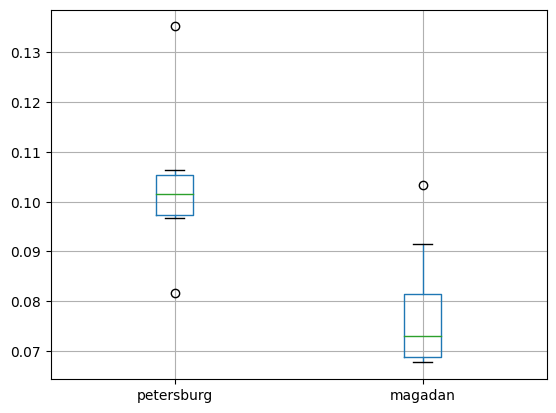

In [30]:
# Получено подтверждение, что данные распредлены нормально и происходят из разных совокупностей, следовательно
# допускается применние параметрических тестов. Зависимые переменные представлены числовыми типами данных.
# Так как выборки данных состоят из 8 вариант (меньше 30), следовательно используем независимый T-тест.

# Независимый Т-тест (t-критерий) используется при сравнении средних значений двух групп. 
# Независимый T-тест проверяет разницу между одной и той же переменной из разных совокупностей
# на выборках размером меньше 30. 

from scipy.stats import ttest_ind

# Установим нулевую и альтернативную гипотезы

H0 = 'Нет значимой разницы между размером мидий из разных городов-производителей.'
Ha = 'Есть значимая разница между размером мидий из разных городов-производителей.'

def t_test(mideas):
    print('\n' + "*** Результаты независимого T-теста ***")
    test_results = ttest_ind(mideas['petersburg'], mideas['magadan'], equal_var=True)

    p = round(test_results[1],2)

    if p>alpha:
        print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
    else:
        print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

t_test(mideas)

# Статистические тест показывает, что существует значимая разница в размерах мидий из разных районов.
# Ответьте на вопрос: Какова разница в среднем размере мидии в зависимости от города-производителя?

# Для ответа на указаный вопрос исследуем описательные статистики предложенных данных.
display(mideas['petersburg'].describe())
display(mideas['magadan'].describe())

# произведем визуализацию наборов данных 
mideas.boxplot(column=['petersburg', 'magadan'])

mean_a= mideas['petersburg'].mean()
mean_b= mideas['magadan'].mean()
print(f'Разница в среднем размере мидий: {round((1 - mean_b/mean_a )*100)}%')

med_a= mideas['petersburg'].median()
med_b= mideas['magadan'].median()
print(f'Разница в медианном размере мидий: {round((1 - med_b/med_a)*100)}%')

## Вывод по разнице в размере мидиий из разных городов-производителей.
#### Опиательные статистики показывают существенные различия в размере мидий из представленных регионов. Визуализация выборок позволяет говорить, что данные принадлежат разным совокупностям. Так, медианные и средние значения у выборок различается на ~28% и ~24% соответсвенно.
#### Применение независимого T-теста подтверждает выводы о наличии различий в размерах мидий между городами-производителями.

# Общий вывод.
### В ходе исследования двух независимых выборок, представленных числовым типом данных, подтверждена гипотеза о принадлежности их к совокупностям, распредленных по нормальному закону. Указанный вывод позволил применить к набору данных параметрические тесты. В частности, проведена проверка выборок на наличие/отсутсвие значимой связи подходящими методами. Отсутсвие значимой связи укладывается в предпосылку о том, что данные получены из независимых совокупностей. К данным применен независимый Т-тест, которым также подтверждено наличие различий в размерах мидий в разных городах-производителях. Изучив описательные статистики двух наборов данных, можно сделать вывод, что средняя и медианная разница в размере мидий составляет ~28% и ~24% соответсвенно. Визуализация выборок также свидетельствует о существенном различии в размере мидий.

# Бонус

Скачаем датасет, содержащий информацию по давлению 120 человек.



In [31]:
!wget https://raw.githubusercontent.com/yug95/MachineLearning/master/Hypothesis%20testing/blood_pressure.csv

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [32]:
data = pd.read_csv('blood_pressure.csv')

In [33]:
print('Размер выборки: ', data.shape)

Размер выборки:  (120, 5)


In [34]:
data.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


## Z-тест

Проведем Z-тест для проверки двух независимых групп данных на равенство средних значений выборок.

In [35]:
from statsmodels.stats import weightstats

In [36]:
_ ,p = weightstats.ztest(data['bp_before'], x2=data['bp_after'], value=0,alternative='two-sided')
print(float(p))


if p < 0.05:
    print("Мы отвергаем нулевую гипотезу об отсутсвии различий между данными.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу об отсутсвии различий между данными.")

0.002162306611369422
Мы отвергаем нулевую гипотезу об отсутсвии различий между данными.


## Z-тест на пропорцию

Z-критерий одной пропорции используется для сравнения наблюдаемой пропорции с теоретической.

В этом тесте используются следующие нулевые гипотезы:

$H_0: p = p_0$ (доля мужчин, предоставивших данные о своем давлении, равна гипотетической пропорции $p_0$)

Альтернативная гипотеза может быть двусторонней, левосторонней или правосторонней:

$H_1 (двусторонний): p ≠ p_0$ (доля мужчин не равна некоторому гипотетическому значению $p_0$)
$H_1 (левосторонний): p < p_0$ (доля мужчин меньше некоторого гипотетического значения $p_0$)
$H_1 (правосторонний): p > p_0$ (доля мужчин больше некоторого гипотетического значения $p_0$)

Предположим, что доля мужчин в нашем датачете равна 40%.

$p_0$: гипотетическая доля мужчин = 0.40

$x$: число мужчин в выборке мужчин: `len(data[data.sex == 'Male'])`

$n$: размер выборки = `len(data)`

Покажем, как использовать функцию `proportions_ztest` для выполнения  **z-теста**:

In [37]:
p_0 = 0.4
n = len(data)
x = len(data[data.sex == 'Male'])

print(n, x)

120 60


In [38]:
from statsmodels.stats.proportion import proportions_ztest

#perform one proportion z-test
_, p = proportions_ztest(count=x, nobs=n, value=p_0)

In [39]:
if p < 0.05:
    print("Мы отвергаем нулевую гипотезу о том, что доля мужчин, предоставивших данные о своем давлении, равна 40%.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу.")

Мы отвергаем нулевую гипотезу о том, что доля мужчин, предоставивших данные о своем давлении, равна 40%.
